In [4]:
## https://github.com/youssefHosni/Time-Series-With-Python/blob/main/Arima%20Models%20in%20Python/ARIMA_Models_In%C2%A0Python.ipynb

# import the important libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

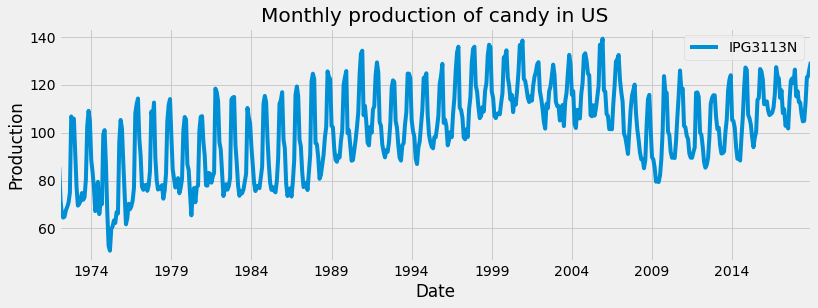

In [12]:
# Load in the time series
candy = pd.read_csv(r'./data/candy_production.csv', 
            index_col='date',
            parse_dates=True)
# change the plot style into fivethirtyeight 
plt.style.use('fivethirtyeight')

# Plot and show the time series on axis ax1
fig, ax1 = plt.subplots()
candy.plot(ax=ax1, figsize=(12, 4))
plt.title('Monthly production of candy in US')
plt.xlabel('Date')
plt.ylabel('Production')
plt.show()

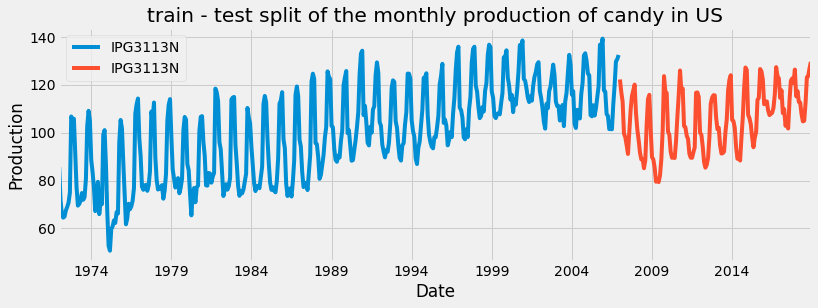

In [13]:
# Split the data into a train and test set
candy_train = candy.loc[:'2006']
candy_test = candy.loc['2007':]

# Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
candy_train.plot(ax=ax, figsize=(12,4))
candy_test.plot(ax=ax)
plt.title('train - test split of the monthly production of candy in US')
plt.xlabel('Date')
plt.ylabel('Production')
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(candy)

output = pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"], columns=['value'])
output['value']['Test Statistic Value'] = result[0]
output['value']['p-value'] = result[1]
output['value']['Lags Used'] = result[2]
output['value']['Number of Observations Used'] = result[3]
output['value']['Critical Value(1%)'] = result[4]['1%']
output['value']['Critical Value(5%)'] = result[4]['5%']
output['value']['Critical Value(10%)'] = result[4]['10%']
output

,value
Test Statistic Value,-1.776015
p-value,0.392433
Lags Used,14
Number of Observations Used,549
Critical Value(1%),-3.442317
Critical Value(5%),-2.866819
Critical Value(10%),-2.569582


In [8]:
result = adfuller(candy.diff().dropna())

output = pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"], columns=['value'])
output['value']['Test Statistic Value'] = result[0]
output['value']['p-value'] = result[1]
output['value']['Lags Used'] = result[2]
output['value']['Number of Observations Used'] = result[3]
output['value']['Critical Value(1%)'] = result[4]['1%']
output['value']['Critical Value(5%)'] = result[4]['5%']
output['value']['Critical Value(10%)'] = result[4]['10%']
output

,value
Test Statistic Value,-6.175912
p-value,0.0
Lags Used,13
Number of Observations Used,549
Critical Value(1%),-3.442317
Critical Value(5%),-2.866819
Critical Value(10%),-2.569582


/usr/local/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


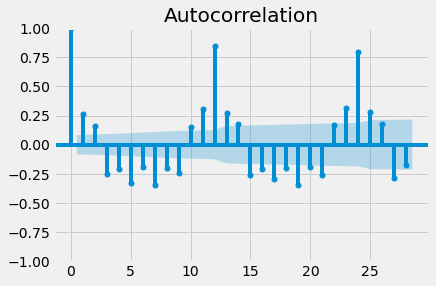

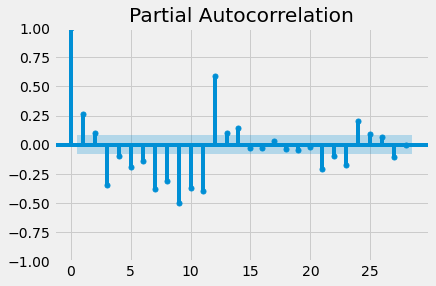

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

candy_diff = candy.diff().dropna()

acf_original = plot_acf(candy_diff)
pacf_original = plot_pacf(candy_diff)

date
1972-07-01     79.643678
1972-08-01     80.101165
1972-09-01     80.475286
1972-10-01     80.861762
1972-11-01     81.377044
                 ...    
2018-02-01    114.982499
2018-03-01    114.995615
2018-04-01    115.094231
2018-05-01    115.388503
2018-06-01    115.777234
Name: trend, Length: 552, dtype: float64
date
1972-01-01     2.536514
1972-02-01    -1.114524
1972-03-01    -7.681536
1972-04-01   -11.804495
1972-05-01   -11.827431
                ...    
2018-08-01    -5.229055
2018-09-01     0.255421
2018-10-01    17.706201
2018-11-01    19.648062
2018-12-01    18.973988
Name: seasonal, Length: 564, dtype: float64


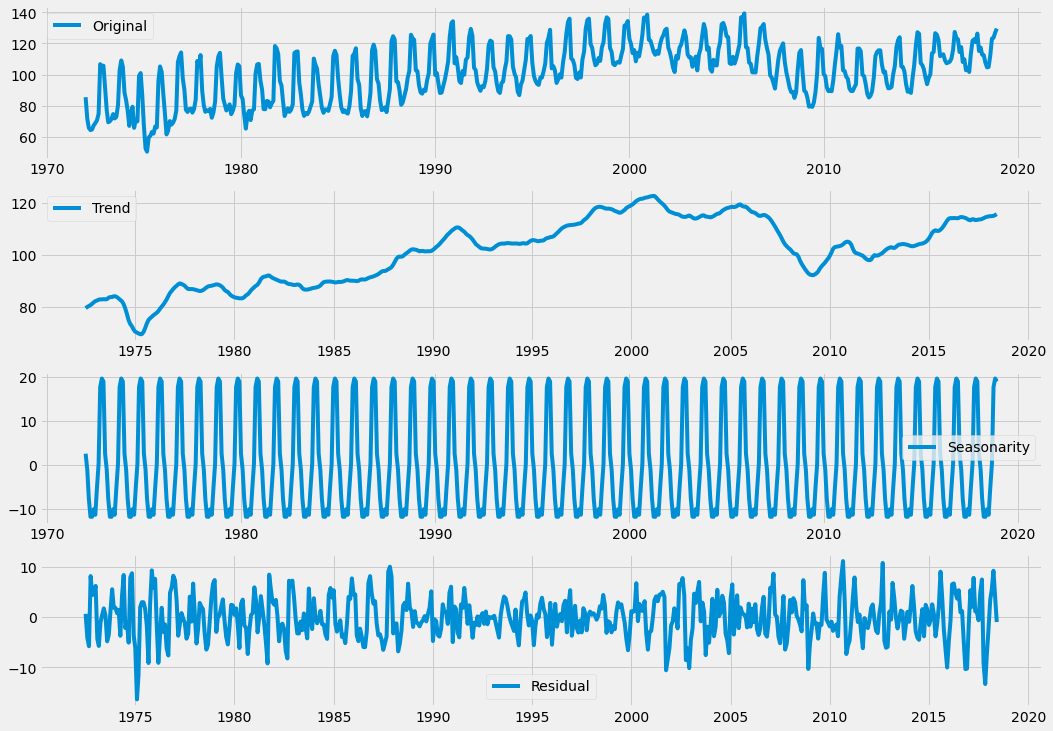

In [22]:
# 看起来是季节性的
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(candy)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16, 12))
plt.subplot(411)
plt.plot(candy, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonarity')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')

In [23]:
# print(trend.fillna(0))

result = adfuller(trend.diff().dropna())

output = pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"], columns=['value'])
output['value']['Test Statistic Value'] = result[0]
output['value']['p-value'] = result[1]
output['value']['Lags Used'] = result[2]
output['value']['Number of Observations Used'] = result[3]
output['value']['Critical Value(1%)'] = result[4]['1%']
output['value']['Critical Value(5%)'] = result[4]['5%']
output['value']['Critical Value(10%)'] = result[4]['10%']
output



,value
Test Statistic Value,-5.494136
p-value,0.000002
Lags Used,19
Number of Observations Used,531
Critical Value(1%),-3.442725
Critical Value(5%),-2.866998
Critical Value(10%),-2.569677


date
1972-08-01    0.457487
1972-09-01    0.374121
1972-10-01    0.386476
1972-11-01    0.515282
1972-12-01    0.577608
                ...   
2018-02-01    0.087023
2018-03-01    0.013116
2018-04-01    0.098616
2018-05-01    0.294272
2018-06-01    0.388731
Name: trend, Length: 551, dtype: float64


<AxesSubplot:xlabel='date'>

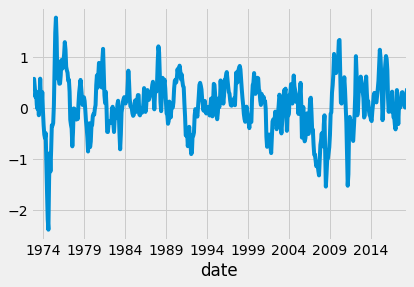

In [29]:
trend_data = pd.Series(trend.diff().dropna())
# trend_data.index = pd.Index(trend['date'])
# trend_data.plot()
print(trend_data)
# trend_data.index = pd.Index(trend_data['date'])
trend_data.plot()

In [31]:
import statsmodels.api as sm

trend_df = trend_data.to_frame(name='value')
residual_df = residual.to_frame(name='value')

trend_evaluate = sm.tsa.arma_order_select_ic(trend_df, ic=['aic', 'bic'], max_ar=4,
                                            max_ma=4)
print('trend AIC', trend_evaluate.aic_min_order)
print('trend BIC', trend_evaluate.bic_min_order)

residual_evaluate = sm.tsa.arma_order_select_ic(residual_df, ic=['aic', 'bic'], max_ar=4,
                                            max_ma=4)
print('residual AIC', residual_evaluate.aic_min_order)
print('residual BIC', residual_evaluate.bic_min_order)

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihoo

trend AIC (3, 4)
trend BIC (3, 4)


/usr/local/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihoo

residual AIC (4, 4)
residual BIC (2, 1)


/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
